In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [2]:
ls


 Volume in drive C has no label.
 Volume Serial Number is D8E2-3661

 Directory of C:\Users\91886

29-12-2022  15:26    <DIR>          .
16-11-2022  18:06    <DIR>          ..
28-12-2022  14:52    <DIR>          .conda
16-11-2022  23:26                25 .condarc
16-11-2022  23:25    <DIR>          .continuum
27-12-2022  21:12               191 .gitconfig
29-12-2022  15:24    <DIR>          .ipynb_checkpoints
16-11-2022  23:28    <DIR>          .ipython
18-11-2022  11:50    <DIR>          .jupyter
17-11-2022  11:03    <DIR>          .matplotlib
29-11-2022  21:23    <DIR>          .spyder-py3
25-11-2022  20:06             1,828 11th Qsn Ans.ipynb
25-11-2022  20:26             7,030 12th Qsn Soln.ipynb
16-11-2022  23:23    <DIR>          anaconda3
30-11-2022  12:21             4,233 boss bby 01.ipynb
16-11-2022  18:03    <DIR>          Contacts
29-12-2022  14:30    <DIR>          Desktop
18-11-2022  13:00           184,585 devil pyth 18 nov.ipynb
27-12-2022  12:08    <DIR>          Docum

In [3]:
toyota =pd.read_csv("ToyotaCorolla.csv",encoding="unicode_escape")
toyota.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [4]:
tat=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
tat

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
tat.rename(columns={'Age_08_04':'age','Quarterly_Tax':'qt'},inplace=True)
tat.head(2)

C:\Users\91886\AppData\Local\Temp\ipykernel_12692\655921455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tat.rename(columns={'Age_08_04':'age','Quarterly_Tax':'qt'},inplace=True)


,Price,age,KM,HP,cc,Doors,Gears,qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [6]:
tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   qt      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
tat.isna().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
qt        0
Weight    0
dtype: int64

In [8]:
tat.corr()

,Price,age,KM,HP,cc,Doors,Gears,qt,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qt,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

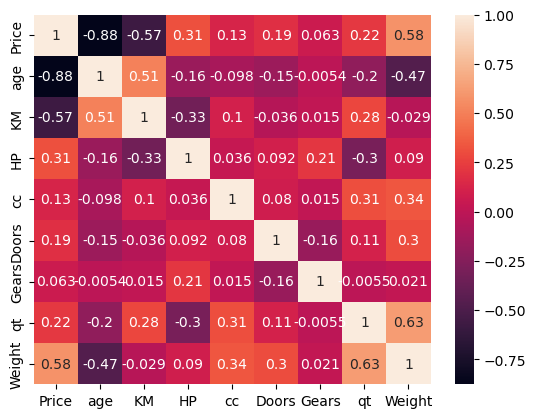

In [9]:
sns.heatmap(tat.corr(),annot=True)

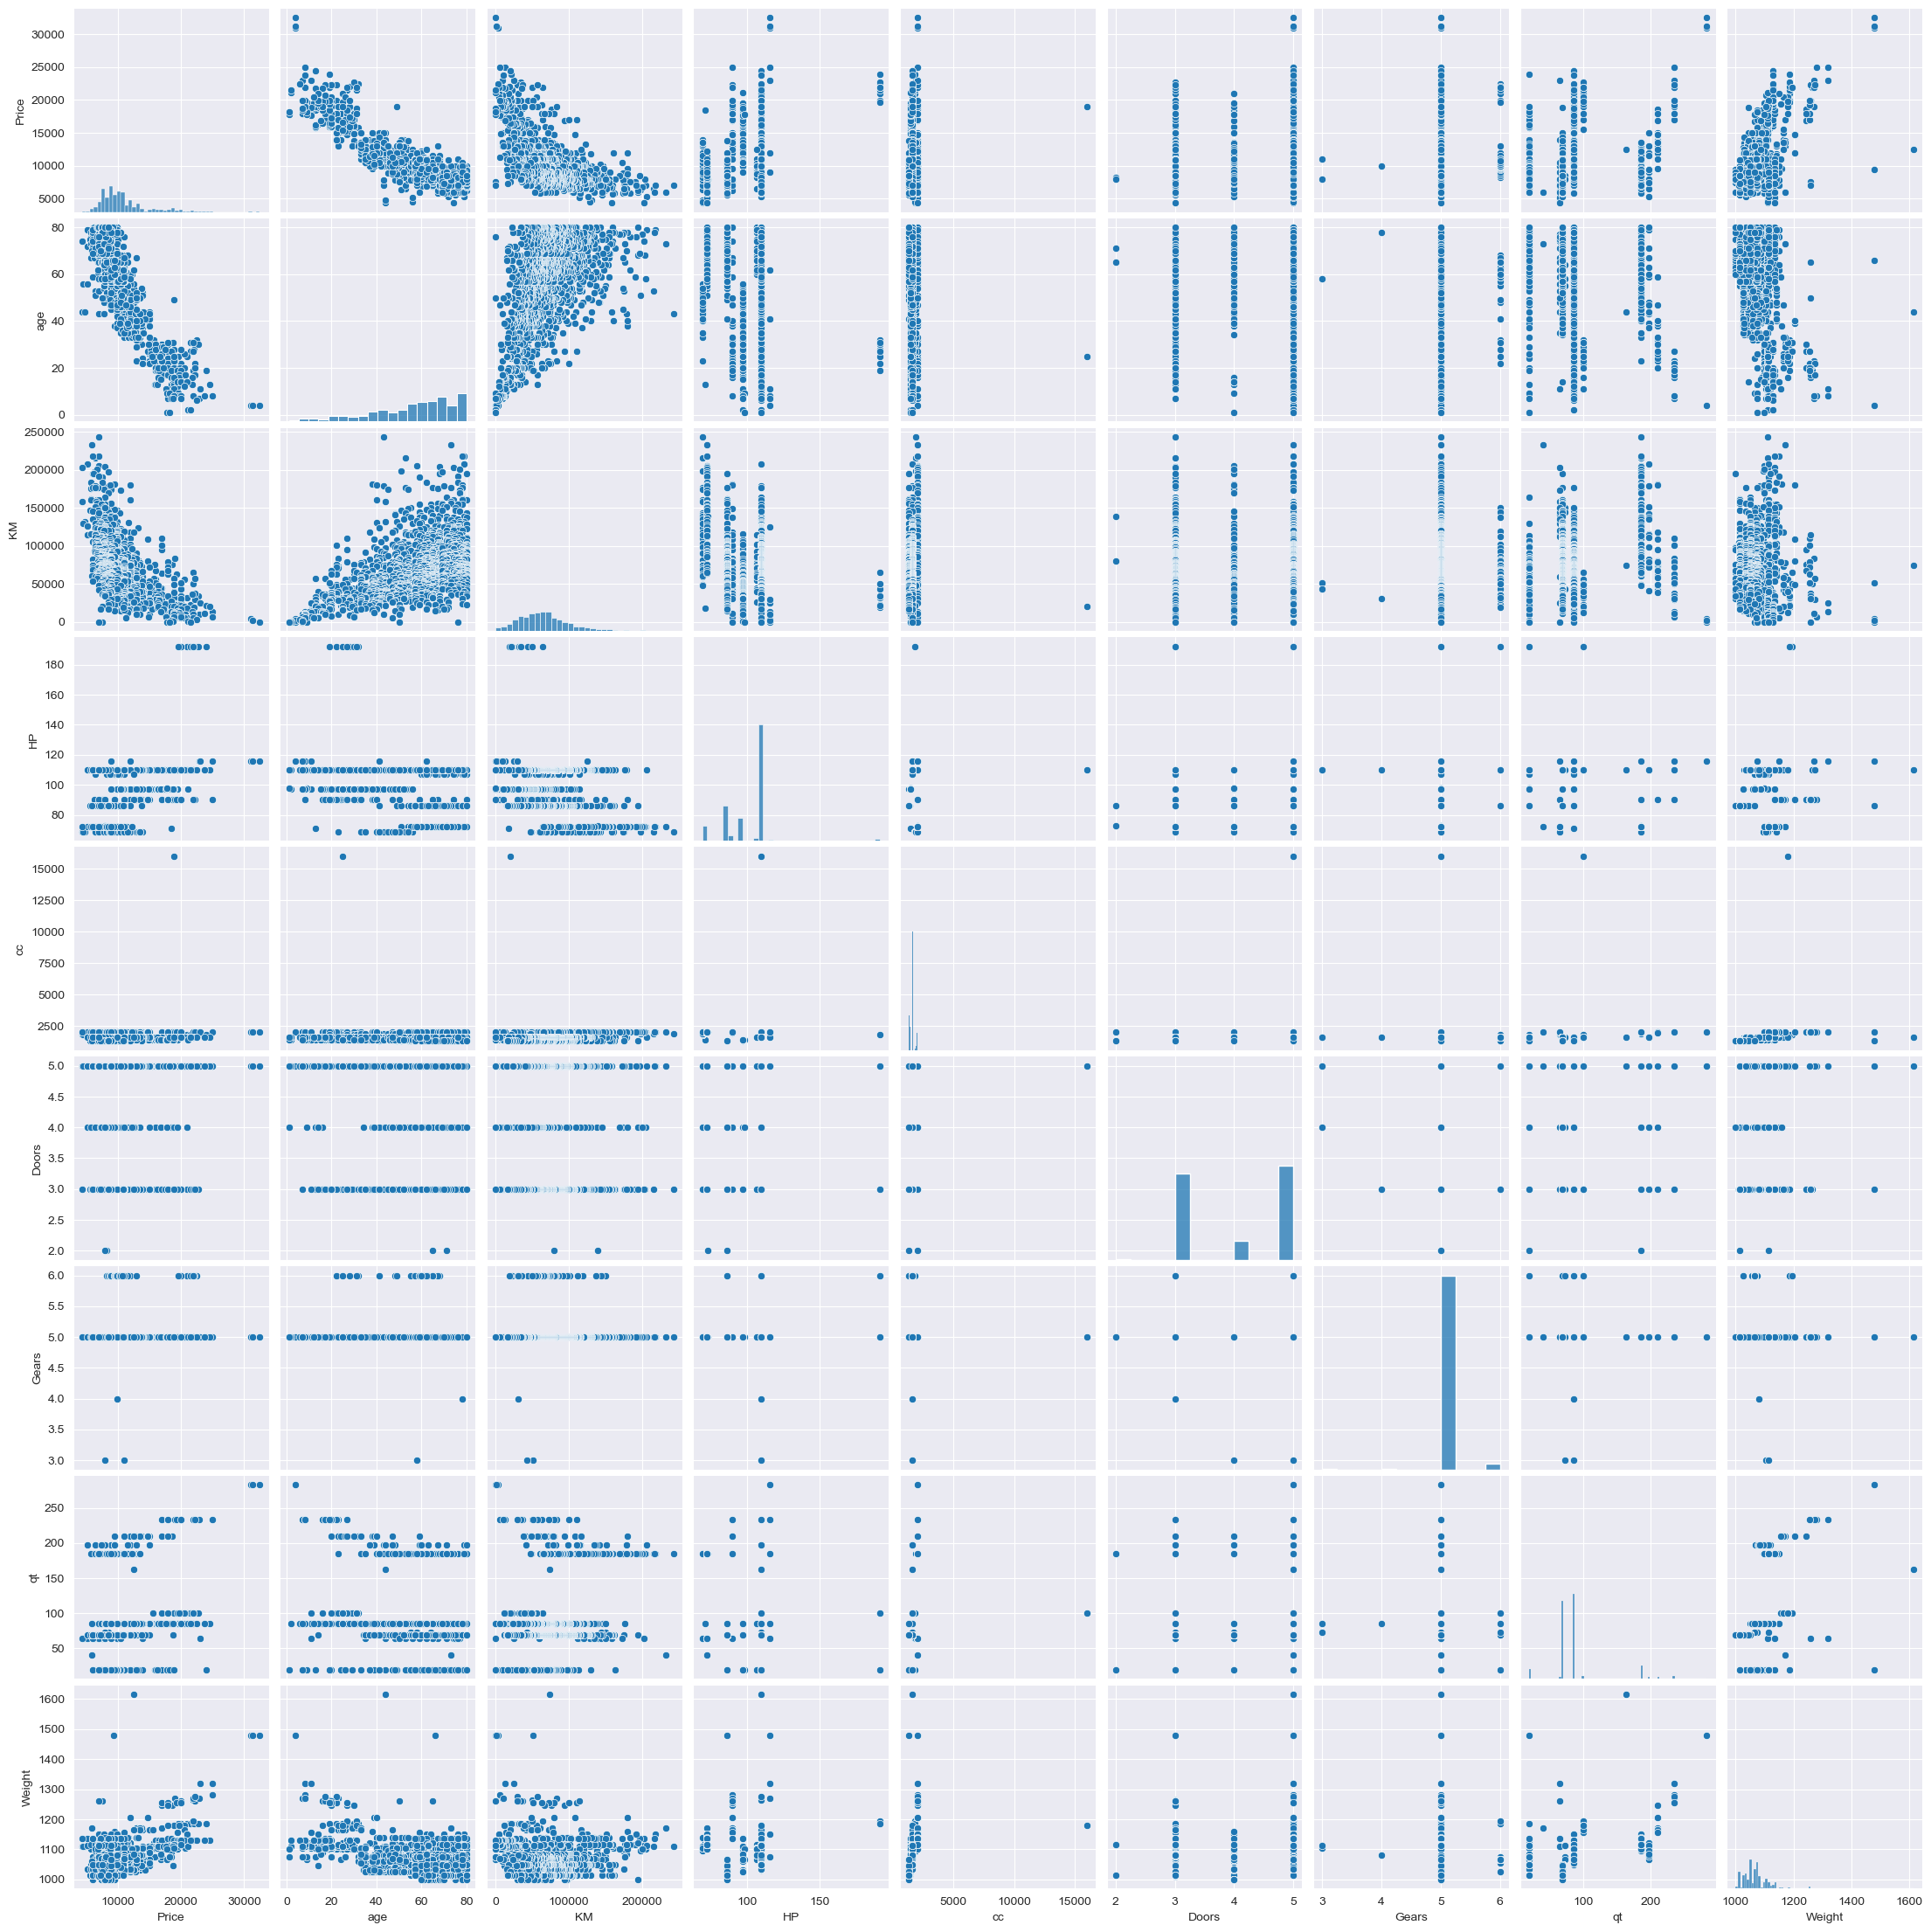

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(tat)

model=smf.ols('Price~age+KM+HP+cc+DoorsGears+qt+Weight',data=tat).fit()

In [11]:
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data=tat).fit()

model.rsquared

In [12]:
model.rsquared

0.8637627463428192

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:48:18   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qt             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+qt+Weight',data=tat).fit().rsquared
Vif_age= 1/(1-rsq_age)
Vif_age

1.8846198056602865

In [15]:
rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+qt+Weight',data=tat).fit().rsquared
Vif_KM= 1/(1-rsq_KM)
Vif_KM

1.7569047782042881

In [16]:
rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+qt+Weight',data=tat).fit().rsquared
Vif_HP= 1/(1-rsq_HP)
Vif_HP

1.4194221086310972

In [17]:
rsq_cc=smf.ols('cc~KM+age+HP+Doors+Gears+qt+Weight',data=tat).fit().rsquared
Vif_cc= 1/(1-rsq_cc)
Vif_cc

1.1638939849423795

In [18]:
rsq_Doors=smf.ols('Doors~KM+age+HP+cc+Gears+qt+Weight',data=tat).fit().rsquared
Vif_Doors= 1/(1-rsq_Doors)
Vif_Doors

1.156575207076043

In [19]:
rsq_Gears=smf.ols('Gears~KM+age+HP+cc+Doors+qt+Weight',data=tat).fit().rsquared
Vif_Gears= 1/(1-rsq_Gears)
Vif_Gears

1.098723019347037

In [20]:
rsq_qt=smf.ols('qt~Gears+KM+age+HP+cc+Gears+Weight',data=tat).fit().rsquared
Vif_qt= 1/(1-rsq_qt)
Vif_qt

2.298377406305921

In [21]:
rsq_Weight=smf.ols('Weight~Gears+KM+age+HP+cc+Gears+qt',data=tat).fit().rsquared
Vif_Weight= 1/(1-rsq_Weight)
Vif_Weight

2.3576652312444124

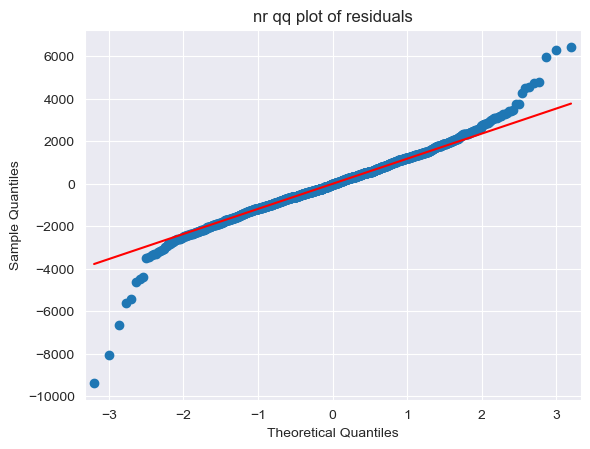

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("nr qq plot of residuals")
plt.show()

eval_env: 1


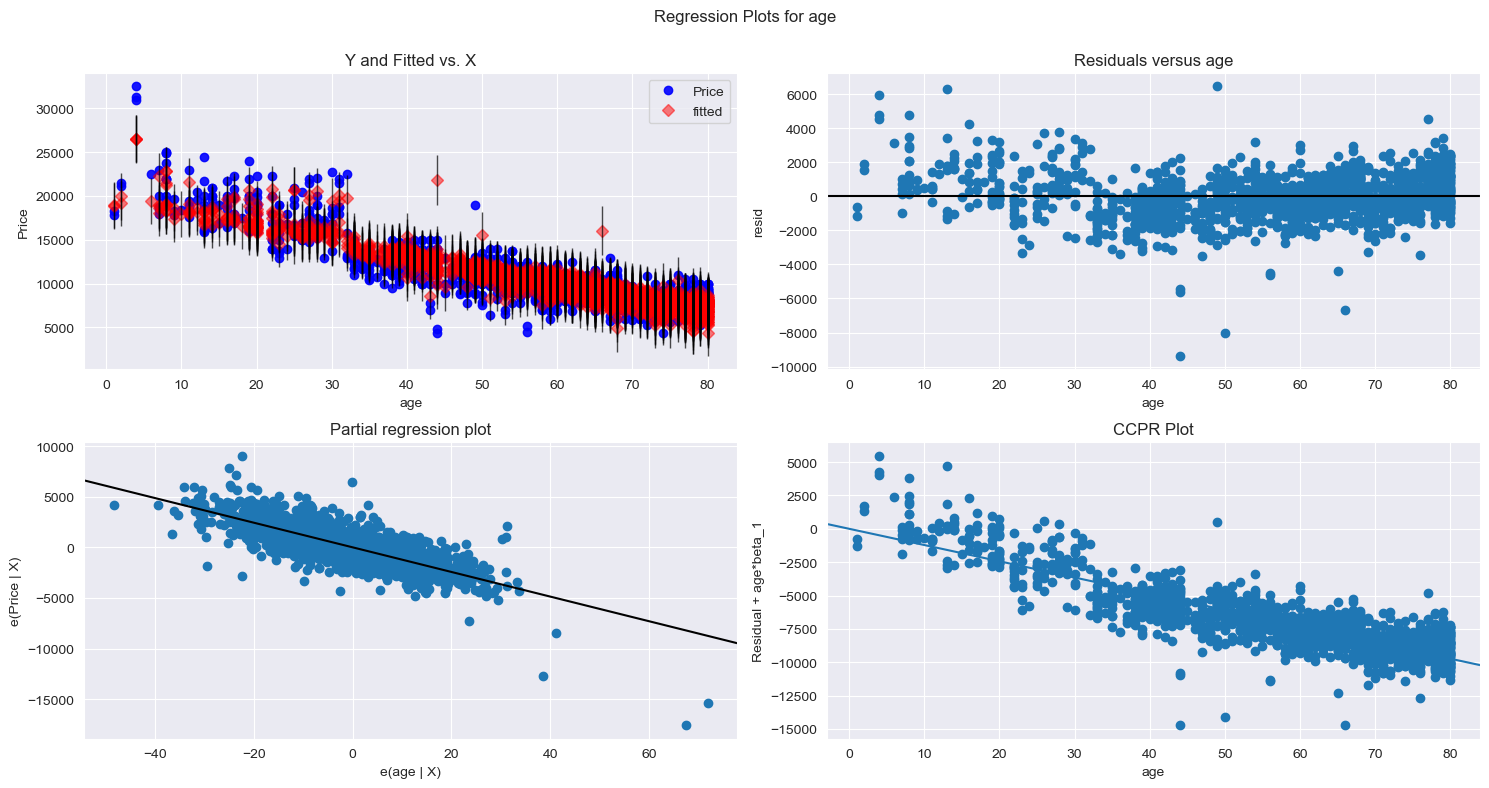

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"age",fig=fig)
plt.show()

eval_env: 1


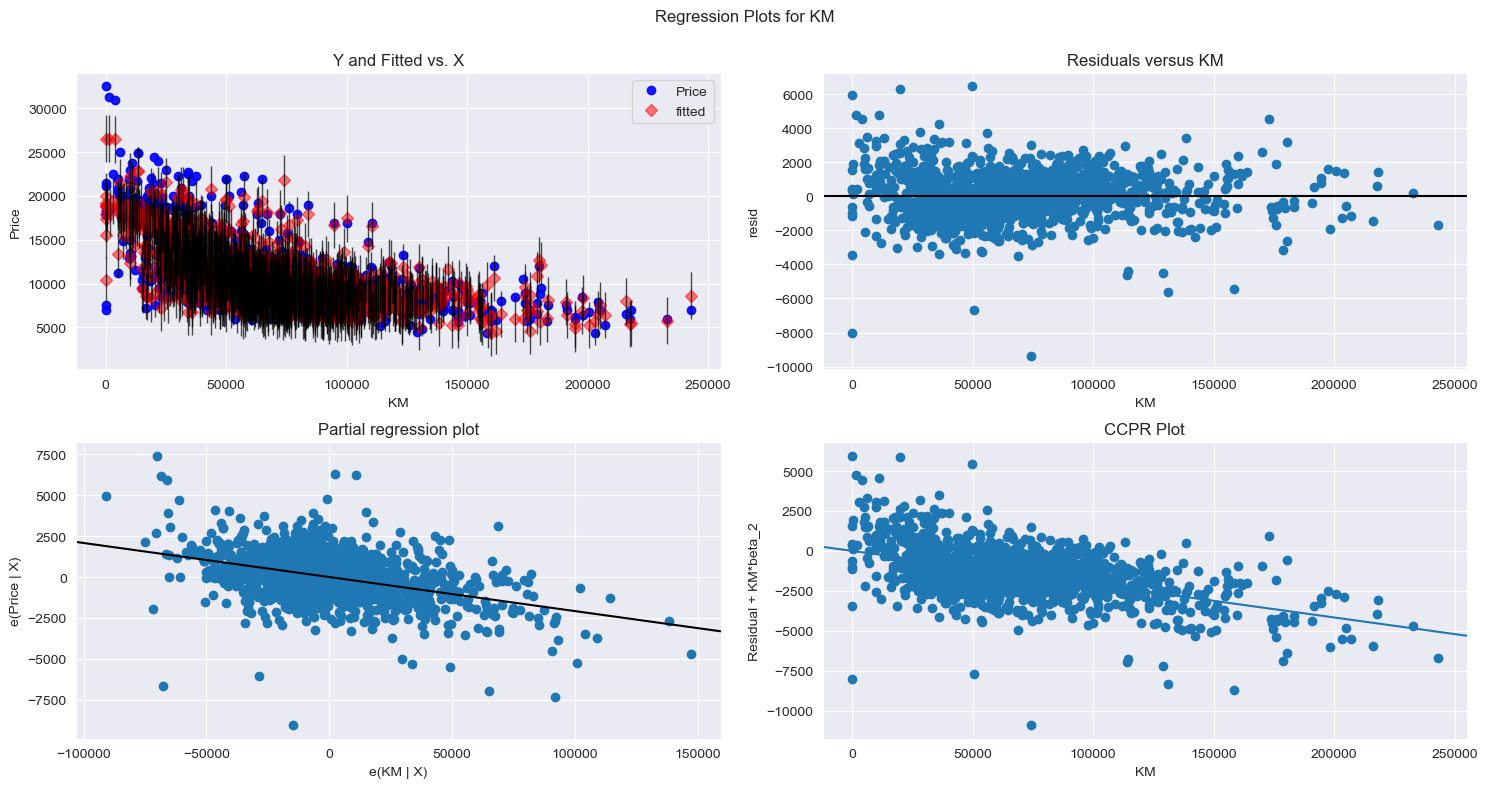

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

eval_env: 1


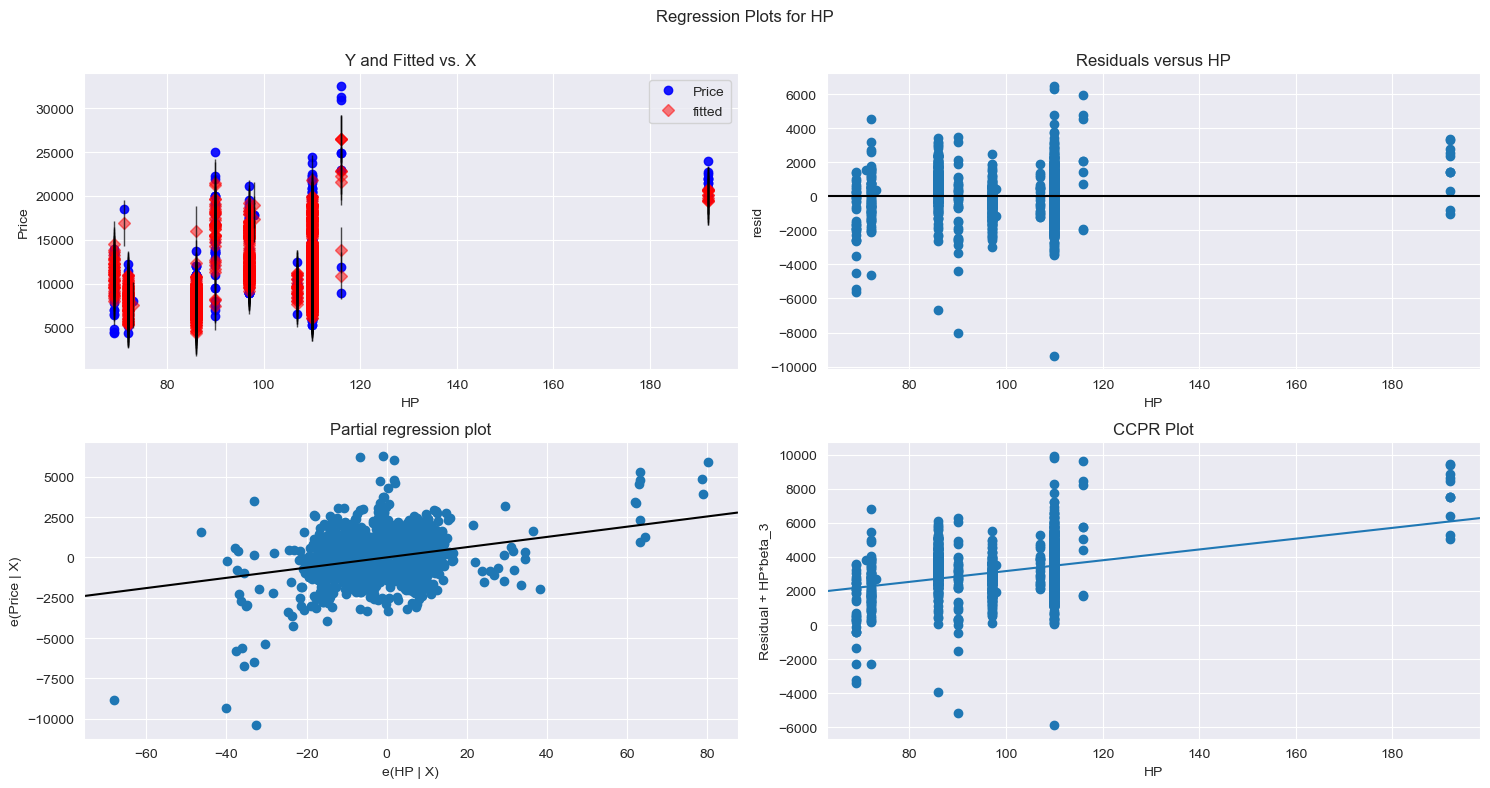

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


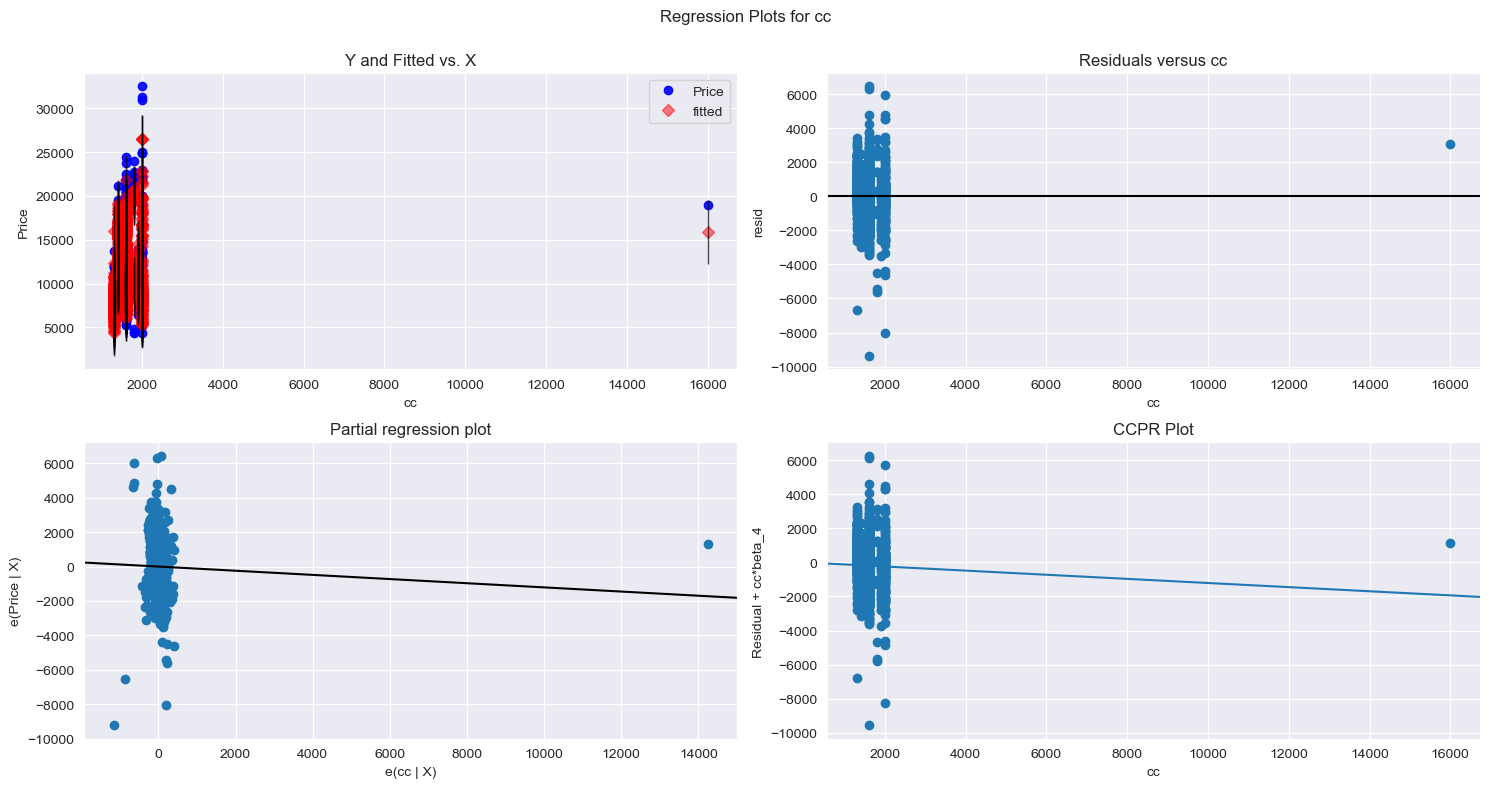

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

eval_env: 1


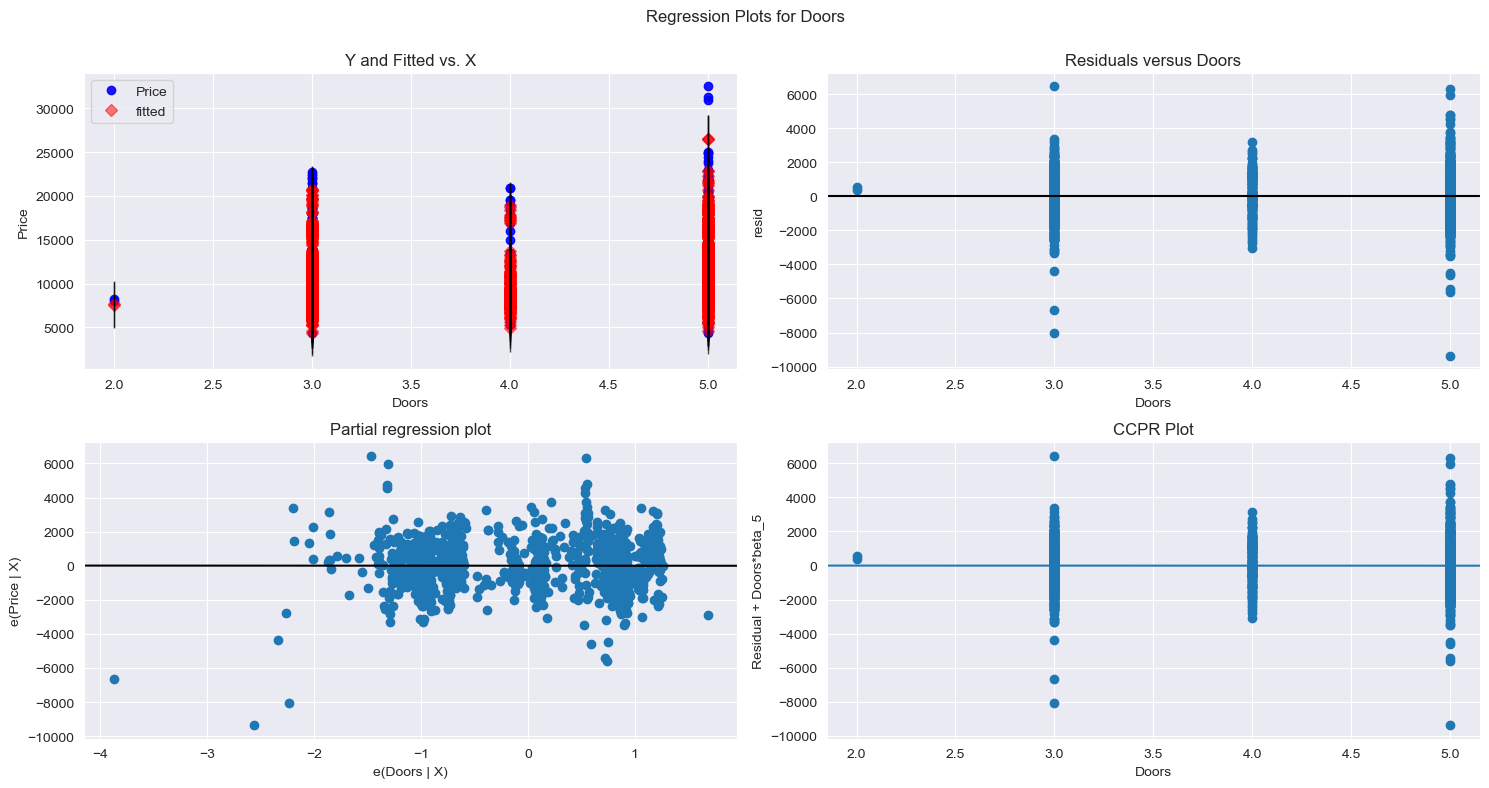

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

eval_env: 1


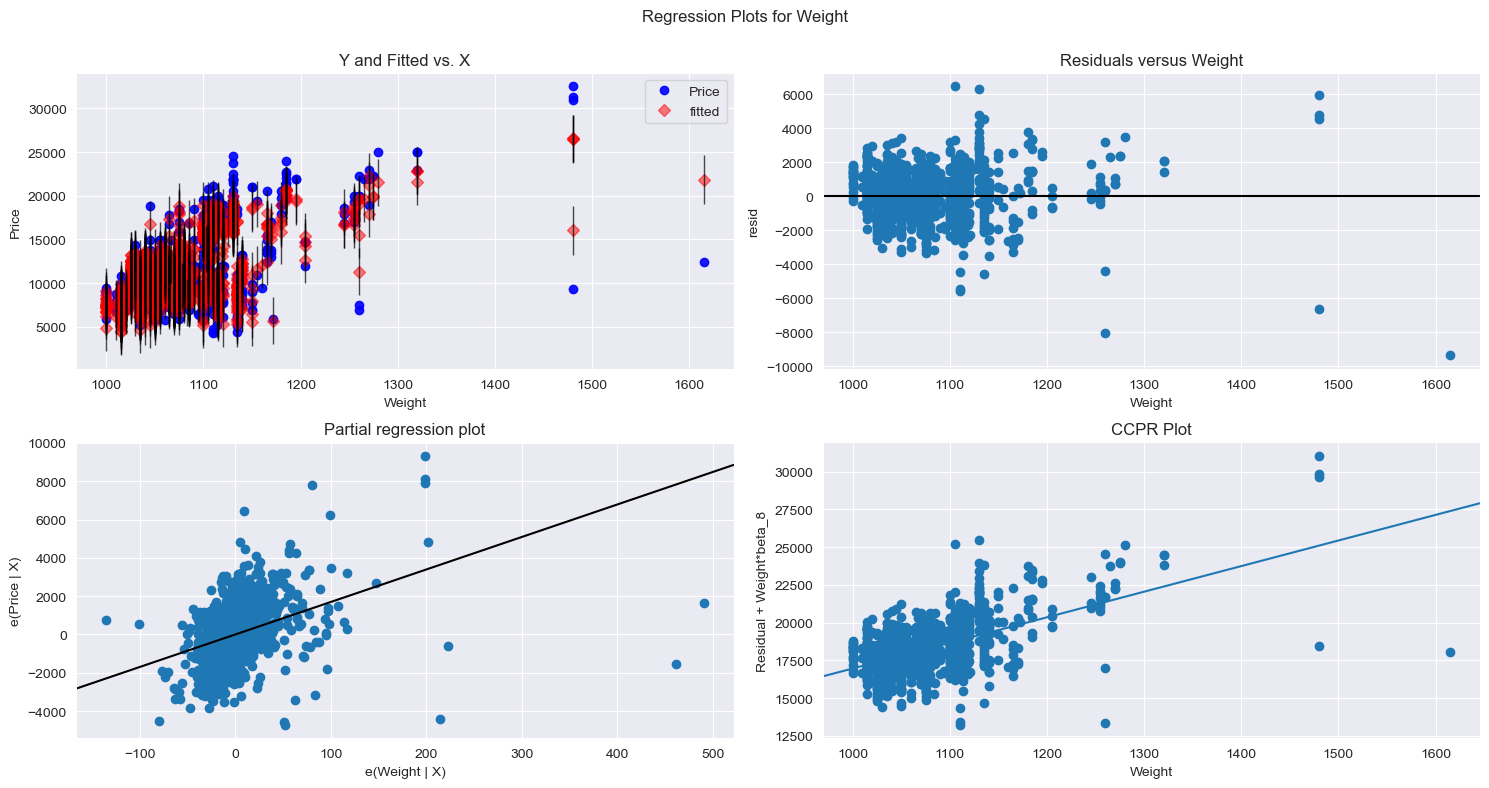

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

eval_env: 1


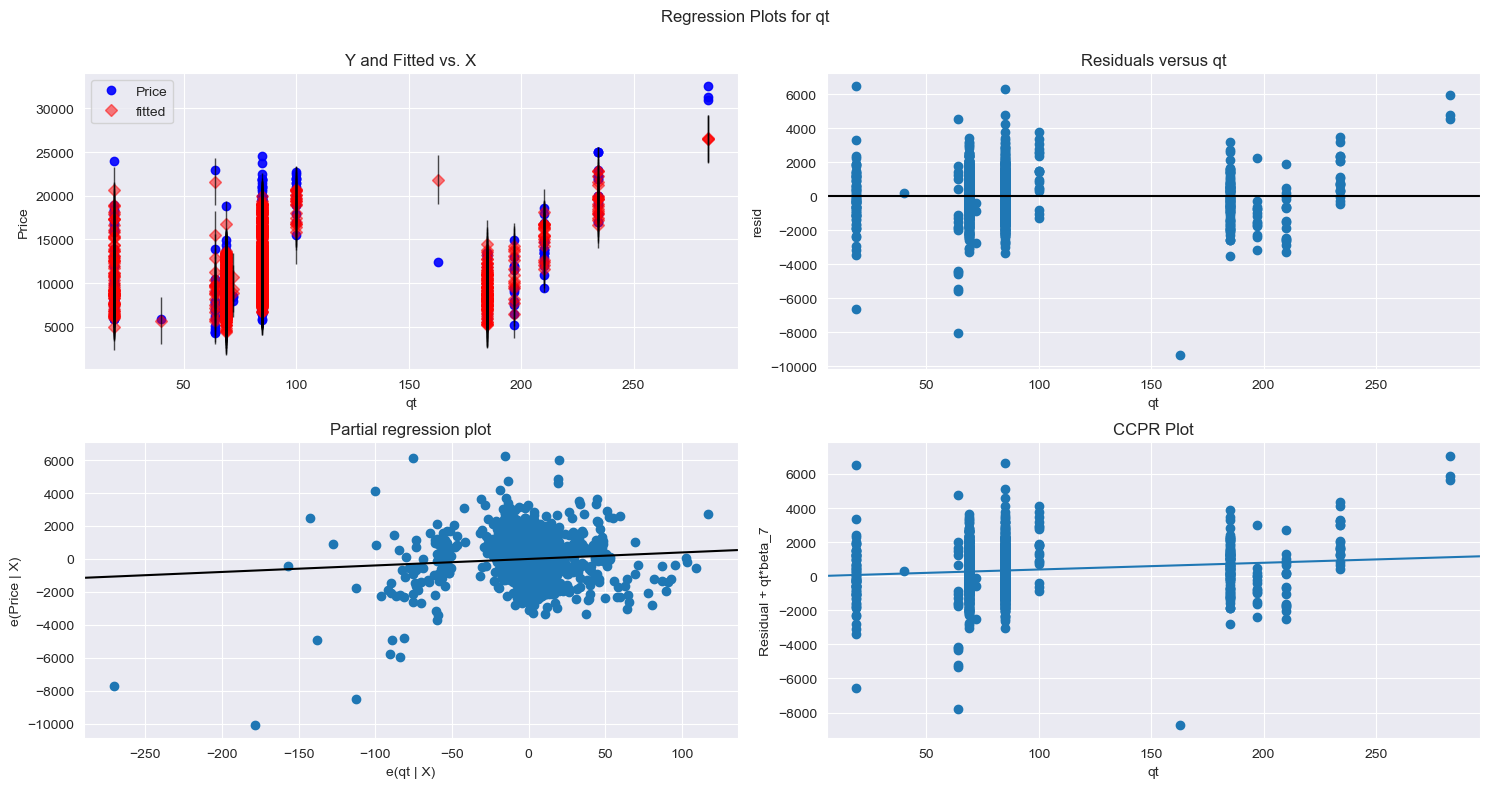

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"qt",fig=fig)
plt.show()

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

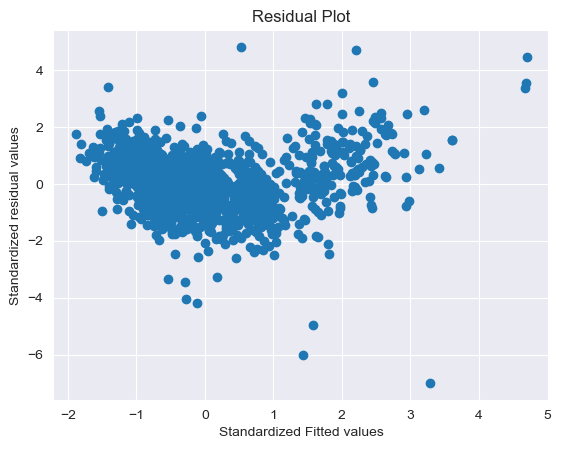

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:49:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qt             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model_influence = model.get_influence()
(t, _) = model_influence.cooks_distance

In [34]:
k=8
N=1436
3*(k+1)/N

0.018802228412256268

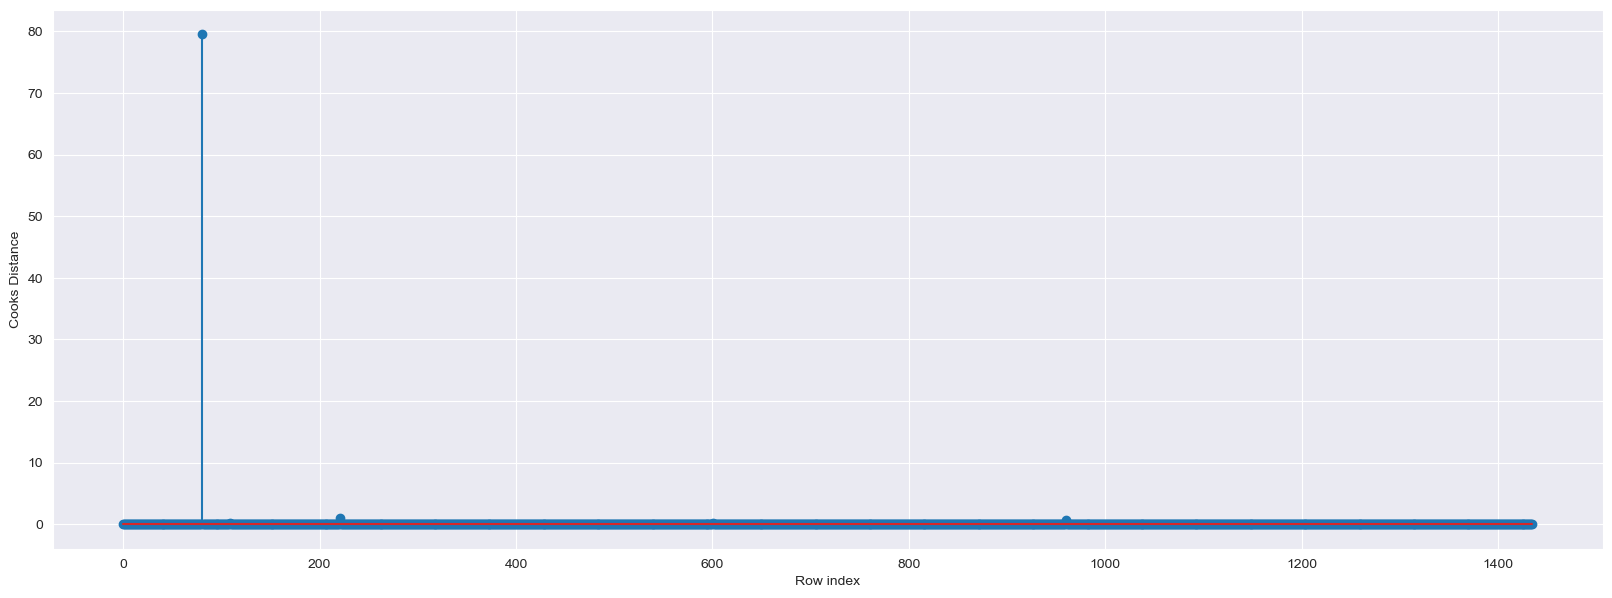

In [36]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(tat)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:

(np.argmax(t),np.max(t))

(80, 79.52010624138055)

In [38]:
np.where(t>0.018)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

In [42]:
tat2=tat.drop(tat.index[[14,16,49,80,109,110,111,141,191,192,221,523,601,654,960,991,1058]],axis=0).reset_index()

In [43]:
tat2=tat2.drop(['index'],axis=1)

In [44]:
tat2

,Price,age,KM,HP,cc,Doors,Gears,qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1414,7500,69,20544,86,1300,3,5,69,1025
1415,10845,72,19000,86,1300,3,5,69,1015
1416,8500,71,17016,86,1300,3,5,69,1015
1417,7250,70,16916,86,1300,3,5,69,1015


In [50]:
final=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data=tat2).fit()

In [51]:
(final.rsquared,final.aic)

(0.8876657300062551, 24047.875456639104)

In [52]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:58:46   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
age         -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM            -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP            28.9815      2.768     10.472      0.000      23.552      34.410
cc            -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors       -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears        308.8824    180.506      1.711      0.087     -45.206     662.971
qt             2.1111      1.358      1.555      0.120      -0.553       4.775
Weight        31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""